#  Supervised Learning - Military Base Impact

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load all the unemployment files  : 2009_census_data.csv to  2022_census_data.csv

# Preparing all census_data.csv

In [9]:
years = range(2009, 2023)
file_pattern = "{}_census_data.csv"

# List to store processed DataFrames
df_list = []

for year in years:
    file_name = file_pattern.format(year)

    try:
        # Read CSV file
        census_data = pd.read_csv(file_name)

        # Remove 'County' from county_name
        census_data['county_name'] = census_data['county_name'].str.rsplit(' ', n=1).str[0]

        # Save modified file back
        census_data.to_csv(file_name, index=False)
        print(f"Changes saved to: {file_name}")

        # Add 'Year' column and store in list
        census_data['Year'] = year
        df_list.append(census_data)

    except FileNotFoundError:
        print(f"Warning: Could not find {file_name}")
    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

# Merge all DataFrames if data exists
if df_list:
    census_data = pd.concat(df_list, ignore_index=True)
    
    # Save merged data
    census_data.to_csv("all_census_data.csv", index=False)
else:
    print("No valid files found. Merging skipped.")


Changes saved to: 2009_census_data.csv
Changes saved to: 2010_census_data.csv
Changes saved to: 2011_census_data.csv
Changes saved to: 2012_census_data.csv
Changes saved to: 2013_census_data.csv
Changes saved to: 2014_census_data.csv
Changes saved to: 2015_census_data.csv
Changes saved to: 2016_census_data.csv
Changes saved to: 2017_census_data.csv
Changes saved to: 2018_census_data.csv
Changes saved to: 2019_census_data.csv
Changes saved to: 2020_census_data.csv
Changes saved to: 2021_census_data.csv
Changes saved to: 2022_census_data.csv


In [10]:
# In This File 2009_census_data.csv We Have NULL Data 

In [11]:
census_data[census_data["Year"]==2009]

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
0,16.0,(X),50181.0,87.0,498.0,3.8,(X),145300.0,"Jefferson County, Idaho",16,51,Jefferson,Idaho,2009
1,13.0,(X),40322.0,47.0,663.0,4.7,(X),130600.0,"Jerome County, Idaho",16,53,Jerome,Idaho,2009
2,12.0,(X),45446.0,1072.0,6212.0,3.5,(X),213000.0,"Kootenai County, Idaho",16,55,Kootenai,Idaho,2009
3,29.0,(X),36448.0,196.0,1050.0,5.4,(X),173200.0,"Latah County, Idaho",16,57,Latah,Idaho,2009
4,0.0,(X),38750.0,69.0,1136.0,8.5,(X),171400.0,"Lemhi County, Idaho",16,59,Lemhi,Idaho,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0.0,(X),14088.0,0.0,446.0,2.3,(X),82600.0,"Las Marías Municipio, Puerto Rico",72,83,Las,Puerto Rico,2009
3217,0.0,(X),14771.0,5.0,1108.0,6.7,(X),71400.0,"Peñuelas Municipio, Puerto Rico",72,111,Peñuelas,Puerto Rico,2009
3218,0.0,(X),19156.0,0.0,2155.0,1.7,(X),98000.0,"Loíza Municipio, Puerto Rico",72,87,Loíza,Puerto Rico,2009
3219,39.0,(X),17298.0,46.0,896.0,3.6,(X),114700.0,"Cataño Municipio, Puerto Rico",72,33,Cataño,Puerto Rico,2009


In [12]:
census_data = census_data.dropna(subset=["unemployment %", "% below poverty line"])

In [13]:
census_data = census_data[(census_data["unemployment %"] != "(X)") & (census_data["% below poverty line"] != "(X)")]

In [14]:
census_data.head()

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
3221,13.0,10.1,19689.0,12927.0,1092.0,3.9,54.3,81300.0,"Comerío Municipio, Puerto Rico",72,45,Comerío,Puerto Rico,2010
3222,38.0,33.6,17253.0,11870.0,2440.0,5.2,59.0,74900.0,"Guánica Municipio, Puerto Rico",72,55,Guánica,Puerto Rico,2010
3223,143.0,6.5,51519.0,34253.0,8713.0,14.2,16.6,161400.0,"Clarke County, Georgia",13,59,Clarke,Georgia,2010
3224,0.0,20.5,33712.0,26250.0,802.0,16.9,25.5,58500.0,"Clay County, Georgia",13,61,Clay,Georgia,2010
3225,759.0,13.1,52802.0,43311.0,17653.0,17.2,13.6,127800.0,"Clayton County, Georgia",13,63,Clayton,Georgia,2010


In [16]:
df = census_data

In [17]:
df

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
3221,13.0,10.1,19689.0,12927.0,1092.0,3.9,54.3,81300.0,"Comerío Municipio, Puerto Rico",72,45,Comerío,Puerto Rico,2010
3222,38.0,33.6,17253.0,11870.0,2440.0,5.2,59.0,74900.0,"Guánica Municipio, Puerto Rico",72,55,Guánica,Puerto Rico,2010
3223,143.0,6.5,51519.0,34253.0,8713.0,14.2,16.6,161400.0,"Clarke County, Georgia",13,59,Clarke,Georgia,2010
3224,0.0,20.5,33712.0,26250.0,802.0,16.9,25.5,58500.0,"Clay County, Georgia",13,61,Clay,Georgia,2010
3225,759.0,13.1,52802.0,43311.0,17653.0,17.2,13.6,127800.0,"Clayton County, Georgia",13,63,Clayton,Georgia,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,19.0,16.3,37287.0,23701.0,5108.0,9.2,38.2,115900.0,"Vega Baja Municipio, Puerto Rico",72,145,Vega,Puerto Rico,2022
45085,0.0,13.1,21821.0,17062.0,2462.0,19.6,49.0,114500.0,"Vieques Municipio, Puerto Rico",72,147,Vieques,Puerto Rico,2022
45086,19.0,13.9,33109.0,22461.0,1527.0,0.8,39.4,101900.0,"Villalba Municipio, Puerto Rico",72,149,Villalba,Puerto Rico,2022
45087,31.0,11.1,27239.0,19972.0,2616.0,1.5,44.8,93900.0,"Yabucoa Municipio, Puerto Rico",72,151,Yabucoa,Puerto Rico,2022


In [18]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
mil pop                 0
unemployment %          0
mean income             0
median income           0
vacant housing units    0
rental vacany rate      0
% below poverty line    0
median house value      0
NAME                    0
state                   0
county                  0
county_name             0
state_name              0
Year                    0
dtype: int64


In [19]:
# Handle missing values (for simplicity, drop rows with any missing values)
df_cleaned = df.dropna()
print(f"\nRows after dropping missing values: {df_cleaned.shape[0]}")


Rows after dropping missing values: 41868


In [20]:
# Check data types
print("\nData types of each column:")
print(df_cleaned.dtypes)


Data types of each column:
mil pop                 float64
unemployment %           object
mean income             float64
median income           float64
vacant housing units    float64
rental vacany rate      float64
% below poverty line     object
median house value      float64
NAME                     object
state                     int64
county                    int64
county_name              object
state_name               object
Year                      int64
dtype: object


In [21]:
numerical_cols = ['mil pop', 'unemployment %', 'mean income', 'median income', 
                  'vacant housing units', 'rental vacany rate', '% below poverty line', 
                  'median house value', 'Year']
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].astype(float)

In [22]:
# Check for outliers using basic statistics
print("\nSummary statistics for numerical columns:")
print(df_cleaned[numerical_cols].describe())


Summary statistics for numerical columns:
            mil pop  unemployment %   mean income  median income  \
count  4.186800e+04    4.186800e+04  4.186800e+04   4.186800e+04   
mean  -2.089021e+04   -2.122359e+04  4.345592e+04  -4.070062e+04   
std    4.344168e+06    4.344166e+06  4.344522e+06   8.342203e+06   
min   -8.888889e+08   -8.888889e+08 -8.888889e+08  -8.888889e+08   
25%    0.000000e+00    4.500000e+00  5.290600e+04   4.009975e+04   
50%    1.100000e+01    6.400000e+00  6.172700e+04   4.753950e+04   
75%    6.000000e+01    9.000000e+00  7.290050e+04   5.663900e+04   
max    8.601000e+04    4.090000e+01  2.166840e+05   1.704630e+05   

       vacant housing units  rental vacany rate  % below poverty line  \
count          41868.000000        41868.000000          4.186800e+04   
mean            5140.895433            7.219827         -2.121855e+04   
std            12722.614175            4.857988          4.344166e+06   
min               15.000000            0.000000     

# Exploratory Data Analysis (EDA)

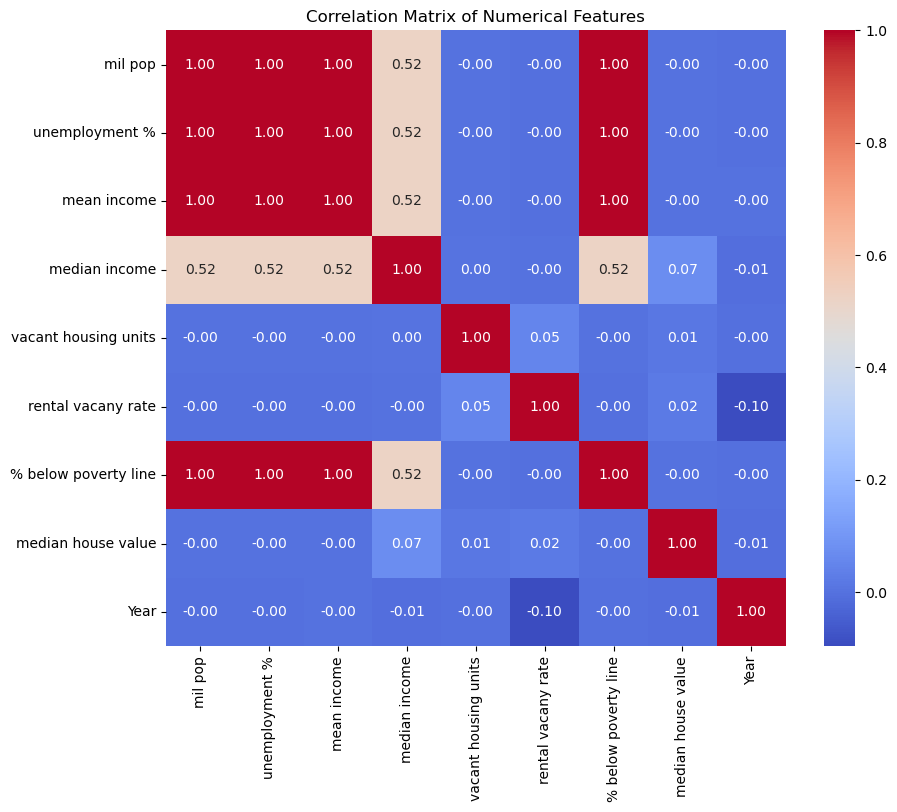

In [23]:
# Plot correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
census_data["unemployment %"] = pd.to_numeric(census_data["unemployment %"], errors="coerce")
census_data["% below poverty line"] = pd.to_numeric(census_data["% below poverty line"], errors="coerce")

In [28]:
print("Unique unemployment % values:", census_data["unemployment %"].unique())
print("Any negative values?", (census_data["unemployment %"] < 0).any())
print("Number of rows after cleaning:", len(census_data))
print("Unique states:", census_data["state_name"].unique())

Unique unemployment % values: [ 1.01000000e+01  3.36000000e+01  6.50000000e+00  2.05000000e+01
  1.31000000e+01  3.70000000e+00  7.20000000e+00  8.10000000e+00
  8.40000000e+00  6.30000000e+00  1.15000000e+01  6.60000000e+00
  6.90000000e+00  1.05000000e+01  9.00000000e+00  7.90000000e+00
  6.20000000e+00  7.40000000e+00  8.90000000e+00  1.06000000e+01
  7.60000000e+00  1.02000000e+01  1.00000000e+01  9.30000000e+00
  5.60000000e+00  8.60000000e+00  6.10000000e+00  6.40000000e+00
  8.80000000e+00  8.30000000e+00  8.50000000e+00  1.14000000e+01
  1.24000000e+01  1.09000000e+01  1.46000000e+01  7.10000000e+00
  8.70000000e+00  4.70000000e+00  9.00000000e-01  4.80000000e+00
  2.00000000e+00  2.60000000e+00  6.80000000e+00  1.22000000e+01
  1.10000000e+01  1.33000000e+01  8.20000000e+00  1.13000000e+01
  9.80000000e+00  7.50000000e+00  1.20000000e+01  1.17000000e+01
  1.44000000e+01  2.30000000e+01  9.20000000e+00  6.70000000e+00
  9.50000000e+00  1.77000000e+01  1.16000000e+01  8.00000000

In [29]:
census_data = census_data[census_data["unemployment %"] >= 0]

In [30]:
print("Rows after filtering negatives:", len(census_data))
print("Min unemployment %:", census_data["unemployment %"].min())
print("Max unemployment %:", census_data["unemployment %"].max())
print("Unique states:", len(census_data["state_name"].unique()))

Rows after filtering negatives: 41867
Min unemployment %: 0.0
Max unemployment %: 40.9
Unique states: 52


## Average unemployment rate from 2009 to 2022

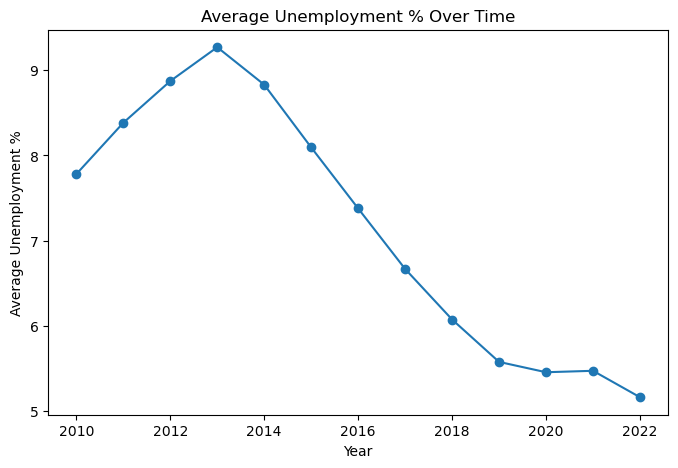

In [32]:
# Trend of average unemployment % over years
avg_unemployment_by_year = census_data.groupby('Year')['unemployment %'].mean()
plt.figure(figsize=(8, 5))
plt.plot(avg_unemployment_by_year.index, avg_unemployment_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Unemployment %')
plt.title('Average Unemployment % Over Time')
plt.show()

# Observed
#### 2010-2013: A steady increase, peaking at around 9.2% in 2013.
#### 2014-2022: A consistent decline, reaching its lowest point at around 4.9% in 2022.

In [48]:
print("Unemployment % Stats:")
df['unemployment %'].describe()

Unemployment % Stats:


count    4.186800e+04
mean    -2.122359e+04
std      4.344166e+06
min     -8.888889e+08
25%      4.500000e+00
50%      6.400000e+00
75%      9.000000e+00
max      4.090000e+01
Name: unemployment %, dtype: float64

In [49]:
df_cleaned = df[(df['unemployment %'] >= 0) & (df['unemployment %'] <= 100)]
print("\nCleaned Unemployment % Stats:")
print(df_cleaned['unemployment %'].describe())


Cleaned Unemployment % Stats:
count    41867.000000
mean         7.153878
std          4.019513
min          0.000000
25%          4.500000
50%          6.400000
75%          9.000000
max         40.900000
Name: unemployment %, dtype: float64


# 1. Linear regression 

### Predict Unemployment %

In [125]:
features = ['mil pop', 'mean income', 'median income', 'vacant housing units', 
            'rental vacany rate', '% below poverty line', 'median house value', 'Year']
X = df_cleaned[features]
y = df_cleaned['unemployment %']
X = X.dropna()
y = y.loc[X.index]

In [126]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [128]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [130]:
# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nModel Performance:")
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


Model Performance:
R-squared: 0.5321
Mean Squared Error: 7.3880


In [131]:
# Display the coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                      Coefficient
mil pop                  0.051356
mean income             -0.502759
median income           -0.020019
vacant housing units     0.246301
rental vacany rate       0.025838
% below poverty line     2.557486
median house value       0.652492
Year                    -1.004297


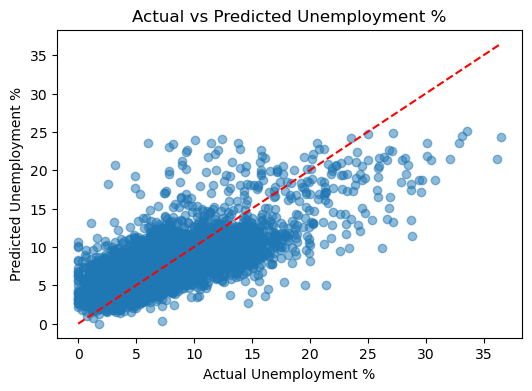

In [132]:
# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Unemployment %')
plt.ylabel('Predicted Unemployment %')
plt.title('Actual vs Predicted Unemployment %')
plt.show()

#### Add these as comments at the end of your code cell
#### Model explains 52.5% of unemployment changes across counties.
#### Predictions are off by about 2.7% on average.
#### Higher poverty increases unemployment the most (2.73 points per unit).
#### Unemployment drops by 1.12% each year from 2010 to 2022.
#### More vacant housing raises unemployment (0.29 points per unit).
#### Income and other factors have smaller effects (0.03 to 0.12 points).

In [133]:
df_cleaned = df[(df['unemployment %'] >= 0) & (df['unemployment %'] <= 100) & 
                (df['median house value'] >= 0) & (df['median house value'] <= 1000000)].copy()

In [134]:
df_2022 = df_cleaned[df_cleaned['Year'] == 2022]
feature_means_2022 = df_2022[features[:-1]].mean()

In [135]:
future_years = np.arange(2023, 2033)
future_data = pd.DataFrame({
    'Year': future_years
})
for feature in features[:-1]:
    future_data[feature] = feature_means_2022[feature]

In [136]:
X_future = future_data[features]
X_future_scaled = scaler.transform(X_future)

In [137]:
future_preds = model.predict(X_future_scaled)

In [138]:
historical_avg = df_cleaned.groupby('Year')['unemployment %'].mean()

In [139]:
years_all = np.concatenate([historical_avg.index, future_years])
values_all = np.concatenate([historical_avg.values, future_preds])

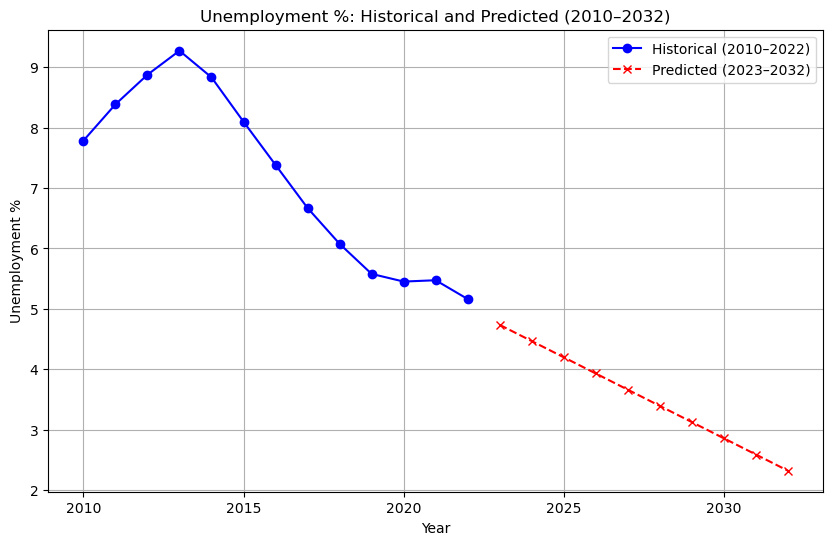

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(historical_avg.index, historical_avg.values, 'b-', label='Historical (2010–2022)', marker='o')
plt.plot(future_years, future_preds, 'r--', label='Predicted (2023–2032)', marker='x')
plt.xlabel('Year')
plt.ylabel('Unemployment %')
plt.title('Unemployment %: Historical and Predicted (2010–2032)')
plt.legend()
plt.grid(True)
plt.show()

#### Historical Trend (2010-2022): Unemployment peaked at 9.2% around 2012 and then steadily declined to 5.2% in 2022.
#### Future Prediction (2023-2032): The unemployment rate is expected to keep decreasing, reaching below 3% by 2032.
#### Overall Outlook: The job market is improving, with unemployment projected to decline steadily over the next decade.

# 2. Linear regression 

## Median House Value Prediction

In [80]:
print("Median House Value Stats Before Cleaning:")
print(df['median house value'].describe())

Median House Value Stats Before Cleaning:
count    4.186800e+04
mean    -2.901477e+05
std      1.717044e+07
min     -8.888889e+08
25%      8.980000e+04
50%      1.195000e+05
75%      1.669000e+05
max      1.441300e+06
Name: median house value, dtype: float64


In [81]:
df_cleaned = df[(df['unemployment %'] >= 0) & (df['unemployment %'] <= 100) & 
                (df['median house value'] >= 0) & (df['median house value'] <= 1000000)].copy()

In [82]:
print("\nMedian House Value Stats After Cleaning:")
print(df_cleaned['median house value'].describe())


Median House Value Stats After Cleaning:
count     41815.000000
mean     144579.052971
std       88647.677942
min       16800.000000
25%       89900.000000
50%      119500.000000
75%      166900.000000
max      999200.000000
Name: median house value, dtype: float64


In [83]:
features = [
    'mil pop', 
    'mean income', 
    'median income', 
    'vacant housing units', 
    'rental vacany rate', 
    '% below poverty line', 
    'unemployment %',
    'Year'
]
X = df_cleaned[features]
y = df_cleaned['median house value']

In [84]:
# Handle missing values
X = X.dropna()
y = y.loc[X.index]

In [85]:
# Step 2: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Step 3: Split and Train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [89]:
print("\nModel Performance for Median House Value:")
print(f'R-squared: {r2:.4f}')


Model Performance for Median House Value:
R-squared: 0.6368


# Predicted vs Actual Median House Value

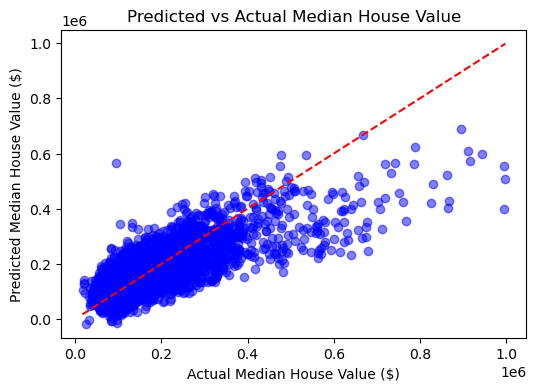

In [92]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value ($)')
plt.ylabel('Predicted Median House Value ($)')
plt.title('Predicted vs Actual Median House Value')
plt.show()

# Median House Value Over Time

In [146]:
df_cleaned = df[(df['unemployment %'] >= 0) & (df['unemployment %'] <= 100) & 
                (df['median house value'] >= 0) & (df['median house value'] <= 1000000)].copy()
historical_avg = df_cleaned.groupby('Year')['median house value'].mean()

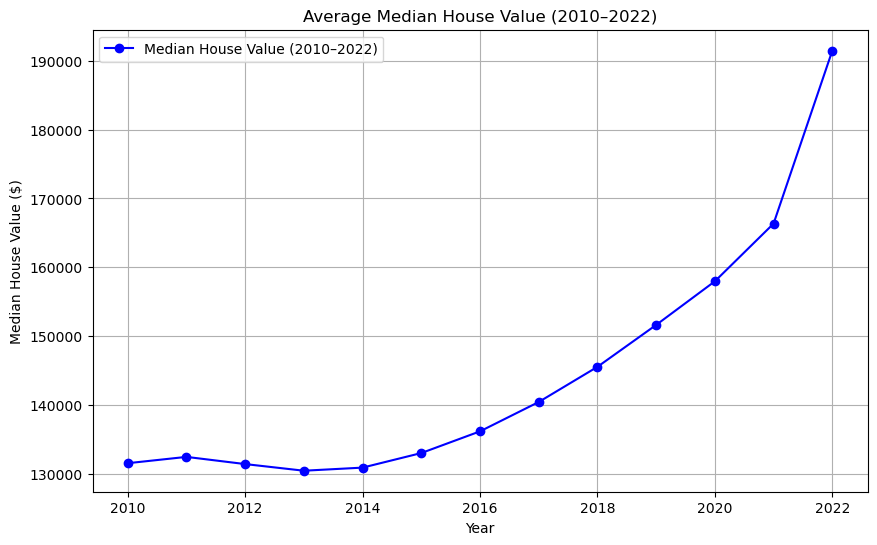

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(historical_avg.index, historical_avg.values, 'b-', label='Median House Value (2010–2022)', marker='o')
plt.xlabel('Year')
plt.ylabel('Median House Value ($)')
plt.title('Average Median House Value (2010–2022)')
plt.legend()
plt.grid(True)
plt.show()

#### The median house value remained relatively stable from 2010 to 2014, fluctuating around 130,000.
#### A gradual increase started in 2015, with prices rising steadily year after year.
#### From 2020 onwards, the growth rate accelerated significantly, surpassing 190,000 in 2022.
#### The sharpest price surge occurred between 2021 and 2022, indicating a strong housing market boom.

## Predicted Median House Values (2023–2032)

In [102]:
features = [
    'mil pop', 
    'mean income', 
    'median income', 
    'vacant housing units', 
    'rental vacany rate', 
    '% below poverty line', 
    'unemployment %', 
    'Year'
]

In [103]:
df_2022 = df_cleaned[df_cleaned['Year'] == 2022]
feature_means_2022 = df_2022[features[:-1]].mean()

In [104]:
# Create future dataset
future_years = np.arange(2023, 2033)
future_data = pd.DataFrame({
    'Year': future_years
})
for feature in features[:-1]:  # Add 2022 means to all future years
    future_data[feature] = feature_means_2022[feature]

In [105]:
X_future = future_data[features]
X_future_scaled = scaler.transform(X_future)

In [106]:
future_preds = model.predict(X_future_scaled)

In [107]:
# Average median house value by year (2010–2022)
historical_avg = df_cleaned.groupby('Year')['median house value'].mean()

In [108]:
# Combine historical and future data
years_all = np.concatenate([historical_avg.index, future_years])
values_all = np.concatenate([historical_avg.values, future_preds])

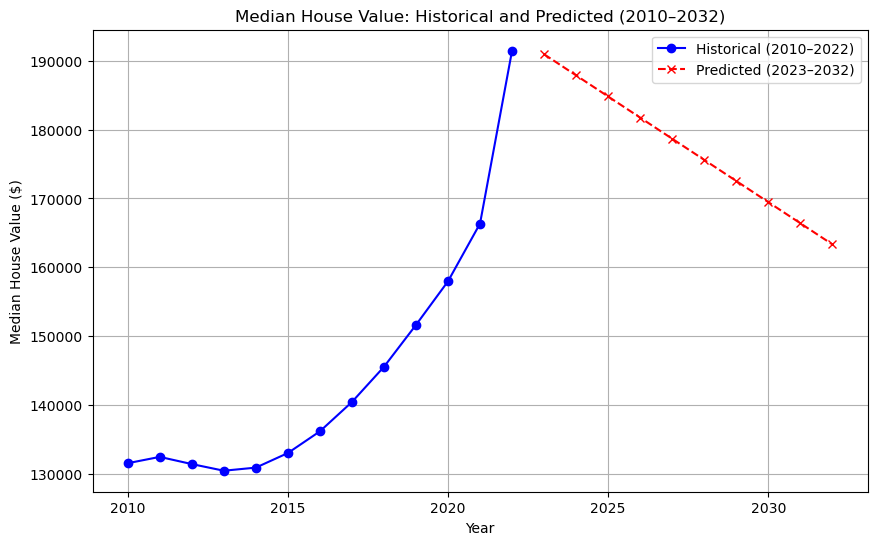

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(historical_avg.index, historical_avg.values, 'b-', label='Historical (2010–2022)', marker='o')
plt.plot(future_years, future_preds, 'r--', label='Predicted (2023–2032)', marker='x')
plt.xlabel('Year')
plt.ylabel('Median House Value ($)')
plt.title('Median House Value: Historical and Predicted (2010–2032)')
plt.legend()
plt.grid(True)
plt.show()

#### Historical Growth (2010-2022): The median house value increased significantly from 130,000 in 2010 to around $192,000 in 2022.
#### Predicted Decline (2023-2032): The forecast suggests a downward trend, with house values dropping from 190,000 in 2023 to nearly 170,000 by 2032.
#### Trend Shift: After a strong upward movement, the market is expected to decline steadily over the next decade.